In [2]:
from matplotlib import pyplot as plt

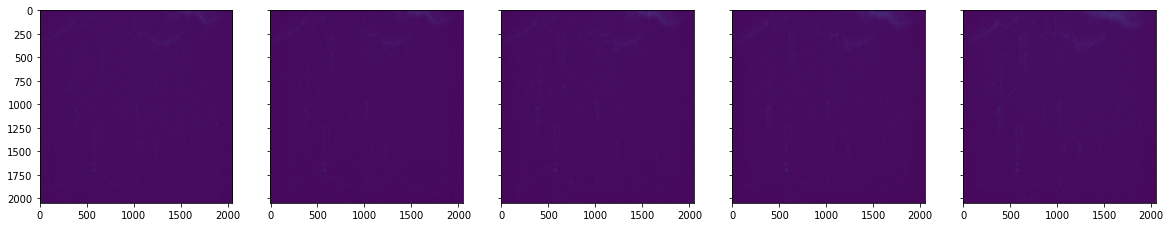

In [3]:
import os
import cv2
import glob

# images = glob.glob("/users/garrigaf/Documents/tests/figures/*")
from darfix.core.dataset import Dataset

filenames = sorted(glob.glob("/nobackup/linkdick1/datasets/LiNbO3_2/*"))
dataset_folder = "/nobackup/linkdick1/datasets/id06/"
# dark_filename = os.path.join(dataset_folder, "bg_ff_5s_1x1/bg_ff_5s_1x1_0000.edf")
dataset = Dataset(filenames=filenames, filter_data=True)
stack = []
    
fig, ax = plt.subplots(ncols=5, figsize=(20, 20), sharex=True,
                               sharey=True)

for i, image in enumerate(dataset.data[:5]):
    ax[i].imshow(image)

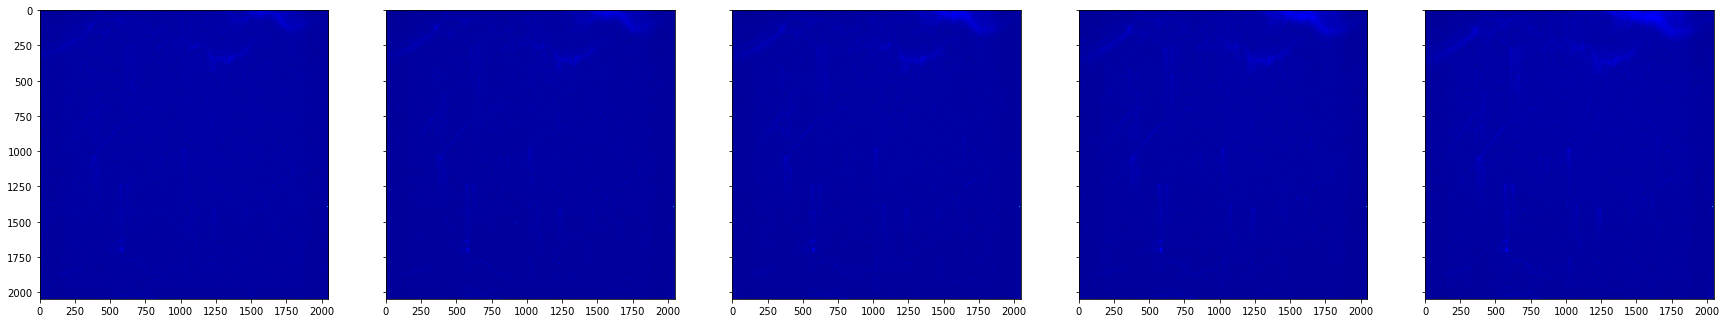

In [4]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 20), sharex=True,
                               sharey=True)

for i, image in enumerate(dataset.data[0:5]):
    ax[i].imshow(image, cmap="jet")

In [5]:
dataset.nframes

51

In [6]:
from darfix.core import roi

data = roi.apply_3D_ROI(dataset.data, [250, 150], [1400, 1050])

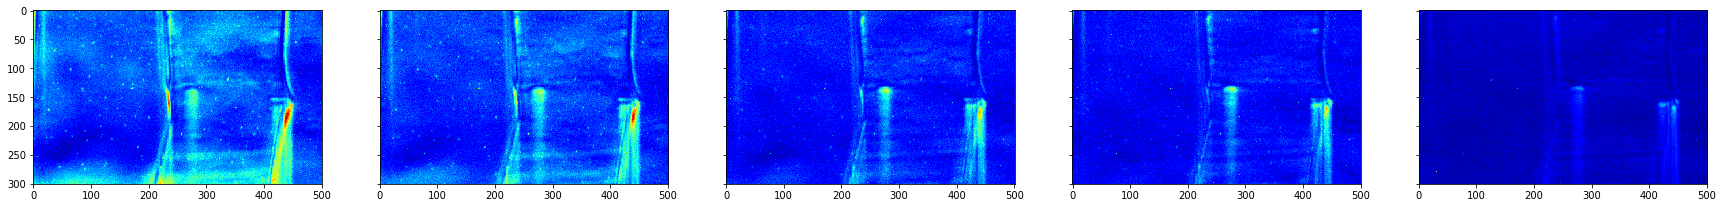

In [7]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 20), sharex=True,
                               sharey=True)

for i, image in enumerate(data[30:35]):
    ax[i].imshow(image, cmap="jet")

In [9]:
from pyGMCA.bss.ngmca.base import tools, algos
nmr = False
data_settings = {}
np.random.seed(33) #32
if nmr:
    data_settings['rows'] = 24
    data_settings['rank'] = 12
    data_settings['dB'] = 40
    reference = bss.tools.create_realistic_nmr_mixtures(data_settings)
else:
    data_settings['rows'] = 100
    data_settings['rank'] = 10
    data_settings['columns'] = 200
    data_settings['dB'] = 10
    data_settings['bernoulli_S'] = 0.08
    data_settings['alpha_S'] = 1
    data_settings['verbose'] = 1
    reference = tools.create_image_mixtures(data_settings)
Y = reference['data'] + reference['noise']

# evaluation function (will be called at each iteration of the algorithm)
criteria_rec = lambda data: tools.evaluation(data, reference)[0]
# sparsity parameter recording function (""")
lambda_rec = lambda data: np.max(data['lambda'])

In create_image_mixtures, field "bernoulli_A" set to default value: 1.
In create_image_mixtures, field "alpha_A" set to default value: 2.
In create_image_mixtures, field "multiplicative_std" set to default value: 0.
In create_image_mixtures, field "smaller_shape" set to default value: True.


AttributeError: module 'scipy.misc' has no attribute 'imread'

In [88]:
in_matrix.shape

(51, 4194304)

In [89]:
n_comp=4
from pyGMCA.bss.gmca import gmca
result = gmca.GMCA(in_matrix,n=n_comp)

KeyboardInterrupt: 

In [42]:
from pyGMCA.bss.ngmca.base import tools, algos
from pyGMCA.bss.ngmca.base.algos import standard
alg = standard.Ngmca()

parameters = {'data': in_matrix,
              'rank': 6,
              'verbose': 1,
              'maximum_iteration': 1000}

# set a particular initialization (for repeatability)
np.random.seed(58)
# launch the algorithm
result = alg.run(parameters)

In Ngmca, field "recording_functions" set to default value.
In Ngmca, field "display_time" set to default value: 0.5.
In Ngmca, field "display_function" set to default value.
In Ngmca, field "relative_difference_tolerance" set to default value: 0.
In Ngmca, field "refinement_ratio" set to default value: 0.2.
In Ngmca's subfield "S_parameters", field "maximum_iteration" set to default value: 80.
In Ngmca's subfield "S_parameters", field "tau_mad" set to default value: 1.
In Ngmca's subfield "A_parameters", field "maximum_iteration" set to default value: 80.
In Ngmca, field "linear_tau_mad_decrease" set to default value: False.
In Ngmca, field "uniform_first_sparsity" set to default value: True.
Iteration 1/1000.
Iteration 2/1000.
Iteration 3/1000.
Iteration 4/1000.
Iteration 5/1000.
Iteration 6/1000.
Iteration 7/1000.
Iteration 8/1000.
Iteration 9/1000.
Iteration 10/1000.
Iteration 11/1000.
Iteration 12/1000.
Iteration 13/1000.
Iteration 14/1000.
Iteration 15/1000.
Iteration 16/1000.
It

In [43]:
result['factorization'].S.shape

(6, 16384)

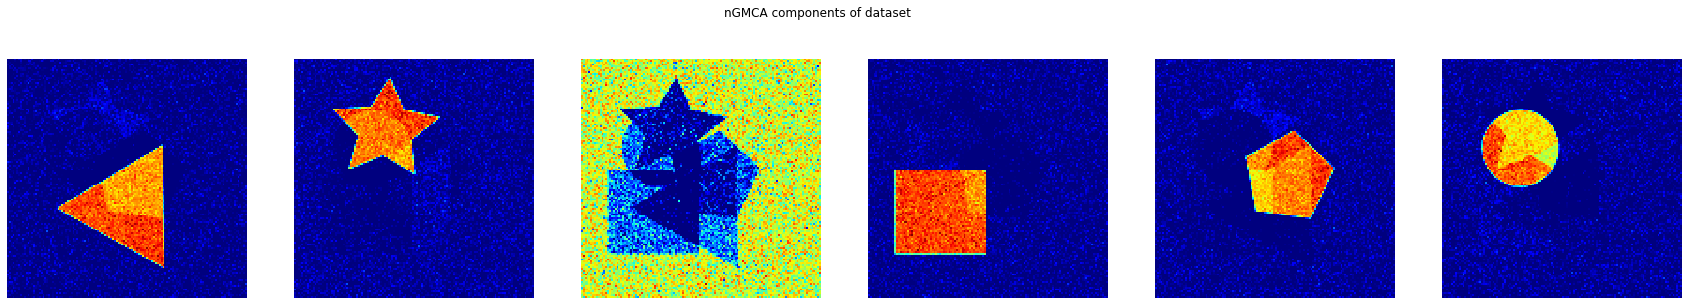

In [45]:
fig, ax = plt.subplots(ncols=6, figsize=(30, 5), sharex=True,
                               sharey=True)

# print(components.shape)
plt.suptitle("nGMCA components of dataset")
for i in np.arange(6):
    ax[i].imshow(result['factorization'].S[i].reshape(stack[0].shape), cmap="jet")
    ax[i].axis("off")

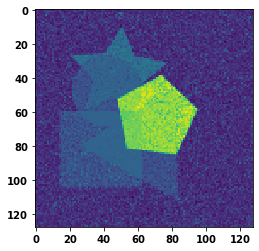

In [54]:
S = result['factorization'].S
plt.imshow((S[4] - S[2]).reshape(stack[0].shape))

In [46]:
def plot_gaussians(ax, W, title="", labels=None):   
    ax.title.set_text(title)
    for i in range(len(W)):
        if labels:
            ax.plot(np.arange(len(W[i])), W[i], label=labels[i])
            ax.legend()
        else:
            ax.plot(np.arange(len(W[i])), W[i])

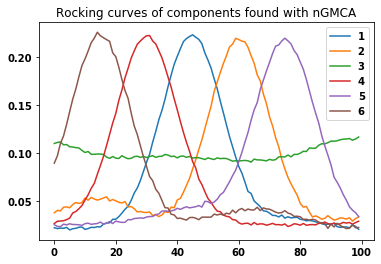

In [48]:
plot_gaussians(plt.subplots()[1], result['factorization'].A.T, title="Rocking curves of components found with nGMCA", labels=["1", "2", "3", "4", "5", "6"])